traj2grid测试

In [2]:
import torch
file_name = "model/cp_139_loss0.273_rank_12.47.pth"
model = torch.load(file_name)

AttributeError: 'dict' object has no attribute 'to'

In [31]:
from traj2grid import Traj2Grid
from parameters import min_lon, max_lon, min_lat, max_lat
import json
str_grid2idx = json.load(open("data/str_grid2idx_400_44612.json"))
grid2idx = {eval(g): str_grid2idx[g] for g in list(str_grid2idx)}
t2g = Traj2Grid(400, 400, min_lon, min_lat, max_lon, max_lat, grid2idx)
model.t2g = t2g
model.mean_x = 104.08007913272864
model.mean_y = 30.68234119864428
model.std_x = 0.021409964446530056
model.std_y = 0.019668597464374094

In [32]:
torch.save(model, f"model/archived_model/{file_name}")

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # 加载PCA算法包
from sklearn.datasets import load_iris
import numpy as np
 
data = load_iris()
y = data.target
x = data.data
x = np.array(x)

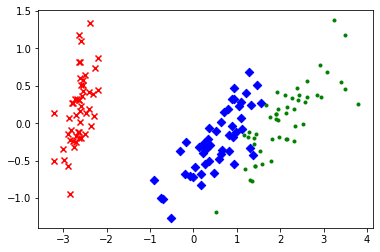

In [9]:
pca = PCA(n_components=2)  # 加载PCA算法，设置降维后主成分数目为2
reduced_x = pca.fit_transform(x)  # 对样本进行降维
# reduced_x = np.dot(reduced_x, pca.components_) + pca.mean_  # 还原数据
 
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
# print(reduced_x)
for i in range(len(reduced_x)):
    if y[i] == 0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

In [7]:
from geopy import distance

num_line = []
time = []
distances = []
for i in range(1,2):
    f = open(f"data/full/order_201611{str(i).zfill(2)}", "r")
    lines = f.readlines()
    num_line.append(len(lines))
    for line in lines:
        line = line.split(",")
        start_coord = (float(line[4]), float(line[3])-180)
        end_coord = (float(line[6]), float(line[5])-180)
        distances.append(distance.distance(start_coord, end_coord).meters)
    f.close()

import numpy as np

np.sum(num_line)
np.sum(time)/np.sum(num_line)
np.sum(distances)/np.sum(num_line)

6638.572991842333